In [74]:
!pip install DOEpy

In [75]:
# Importar el modulo build del paquete
from doepy import build

# Importar las demás librerias a usar
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

factors = {
    'A': [-1, 0, 1],
    'B': [-1, 0, 1],
    'C': [-1, 0, 1],}

design = build.central_composite(factors, center=(0, 6), alpha='o', face='ccf')

# Agregar los valores de respuesta al DataFrame
# Y:
design['Y'] = [11.72,	15.47,	6.4,	12.49,	12.12,	15.8,	6.93,	12.64,	11.24,	15.95,	15.35,	11.22,	14.55,	14.84,	15.14,	15.22,	14.99,	15.09,	14.93,	15.38]

print(design)

A had more than two levels. Assigning the end point to the high level.
B had more than two levels. Assigning the end point to the high level.
C had more than two levels. Assigning the end point to the high level.
      A    B    C      Y
0  -1.0 -1.0 -1.0  11.72
1   1.0 -1.0 -1.0  15.47
2  -1.0  1.0 -1.0   6.40
3   1.0  1.0 -1.0  12.49
4  -1.0 -1.0  1.0  12.12
5   1.0 -1.0  1.0  15.80
6  -1.0  1.0  1.0   6.93
7   1.0  1.0  1.0  12.64
8  -1.0  0.0  0.0  11.24
9   1.0  0.0  0.0  15.95
10  0.0 -1.0  0.0  15.35
11  0.0  1.0  0.0  11.22
12  0.0  0.0 -1.0  14.55
13  0.0  0.0  1.0  14.84
14  0.0  0.0  0.0  15.14
15  0.0  0.0  0.0  15.22
16  0.0  0.0  0.0  14.99
17  0.0  0.0  0.0  15.09
18  0.0  0.0  0.0  14.93
19  0.0  0.0  0.0  15.38


In [76]:
pip install tabulate

In [77]:
pip install colorama

In [78]:
import numpy as np
# Ajustar un modelo
modelo = ols('Y ~ A + B + C + np.power(A, 2) + np.power(B, 2) + np.power(C, 2) + A:B', data=design).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=1)
R2 = modelo.rsquared*100
R2adj = modelo.rsquared_adj*100
Df_Model = modelo.df_model
p_value = modelo.f_pvalue
resumen = modelo.summary2()

# Crear una tabla HTML con fondo blanco, bordes negros y ancho automático de celdas
tabla_html = f'''
<table style="border-collapse: collapse; width: auto;">
  <tr style="background-color: grey;">
    <th style="border: 1px solid black; padding: 3px; color: black;">Estadístico</th>
    <th style="border: 1px solid black; padding: 3px; color: black;">Valor</th>
  </tr>
   <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 3px; text-align: right;color: black;">R<sup>2</sup> =</th>
    <td style="border: 1px solid black; padding: 3px; color: black;">{R2:.2f}%</td>
  </tr>
   <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 3px; text-align: right;color: black;">R<sub>ADJ</sub><sup>2</sup> =</th>
    <td style="border: 1px solid black; padding: 3px; color: black;">{R2adj:.2f}%</td>
  </tr>
   <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 3px; text-align: right;color: black;">Valor-p del modelo =</th>
    <td style="border: 1px solid black; padding: 3px; color: black;">{p_value:.6}</td>
  </tr>
   <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 3px; text-align: right;color: black;">GL del modelo =</th>
    <td style="border: 1px solid black; padding: 3px; background-color: white; color: black;">{Df_Model}</td>
  </tr>
</table>
'''

# Mostrar la tabla HTML de la calidad del modelo y el ANOVA
from IPython.display import display, HTML
display(HTML(tabla_html))
print(tabla_anova)

# Extraer el valor p máximo
nombre_efecto_menor_p = tabla_anova['PR(>F)'].idxmax()
mayor_valor_p = tabla_anova['PR(>F)'].max()

# Crear una tabla HTML para el menor efecto con fondo blanco, bordes negros y ancho automático de celdas
tabla_html = f'''
<table style="border-collapse: collapse; width: auto;">
  <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 5px; text-align: right;color: black;">Efecto menos significativo:</th>
    <td style="border: 1px solid black; padding: 5px; color: black;">{nombre_efecto_menor_p}</td>
  </tr>
  <tr style="background-color: white;">
    <th style="border: 1px solid black; padding: 5px; text-align: right;color: black;">Valor p:</th>
    <td style="border: 1px solid black; padding: 5px; background-color: white; color: black;">{mayor_valor_p:.6}</td>
  </tr>
</table>
'''
# Mostrar la tabla HTML para el menor efecto
display(HTML(tabla_html))

# Convertir el resumen del modelo en un DataFrame de pandas
resumen_df = resumen.tables[1]
# Renombrar las columnas para mayor claridad
resumen_df.columns = ['Variable', 'Coeficiente', 'Std.Error', 't-value', 'p-value', 'Intervalo de Confianza']
# Extraer las columnas de variable (efecto) y coeficiente/parámetros del modelo
efectos = resumen_df['Variable']
# Crear un DataFrame con dos columnas: efectos y coeficientes/parámetros del modelo
efectos_coeficientes_df = pd.DataFrame({'Efecto': efectos})

# Mostrar el DataFrame con efectos y coeficientes/parámetros del modelo
print(efectos_coeficientes_df)

Estadístico,Valor
R2 =,99.84%
RADJ2 =,99.75%
Valor-p del modelo =,8.07222e-16
GL del modelo =,7.0


                  df     sum_sq    mean_sq            F        PR(>F)
A                1.0  57.312360  57.312360  2922.639923  1.056411e-15
B                1.0  43.180840  43.180840  2202.004016  5.732450e-15
C                1.0   0.289000   0.289000    14.737535  2.356955e-03
np.power(A, 2)   1.0  33.670125  33.670125  1717.005748  2.528813e-14
np.power(B, 2)   1.0  10.548781  10.548781   537.934387  2.458303e-11
np.power(C, 2)   1.0   0.239319   0.239319    12.204043  4.435239e-03
A:B              1.0   2.387112   2.387112   121.730641  1.225790e-07
Residual        12.0   0.235318   0.019610          NaN           NaN


Efecto menos significativo:,"np.power(C, 2)"
Valor p:,0.00443524


                  Efecto
Intercept       15.07100
A                2.39400
B               -2.07800
C                0.17000
np.power(A, 2)  -1.39500
np.power(B, 2)  -1.70500
np.power(C, 2)  -0.29500
A:B              0.54625


In [79]:
# Extraer los coeficientes del modelo
coeficientes = modelo.params

# Crear la ecuación del modelo
ecuacion_modelo = "Y = {:.4f}".format(coeficientes['Intercept'])

# Obtener los nombres de las variables predictoras
variables_predictoras = [nombre for nombre in coeficientes.index if nombre != 'Intercept']

# Agregar los términos de las variables predictoras y sus coeficientes
for variable in variables_predictoras:
    coeficiente = coeficientes.get(variable, 0)
    if coeficiente != 0:
        ecuacion_modelo += " + {:.4f} * {}".format(coeficiente, variable)

# Imprimir la ecuación del modelo
print("Ecuación del modelo:")
print(ecuacion_modelo)


Ecuación del modelo:
Y = 15.0710 + 2.3940 * A + -2.0780 * B + 0.1700 * C + -1.3950 * np.power(A, 2) + -1.7050 * np.power(B, 2) + -0.2950 * np.power(C, 2) + 0.5462 * A:B


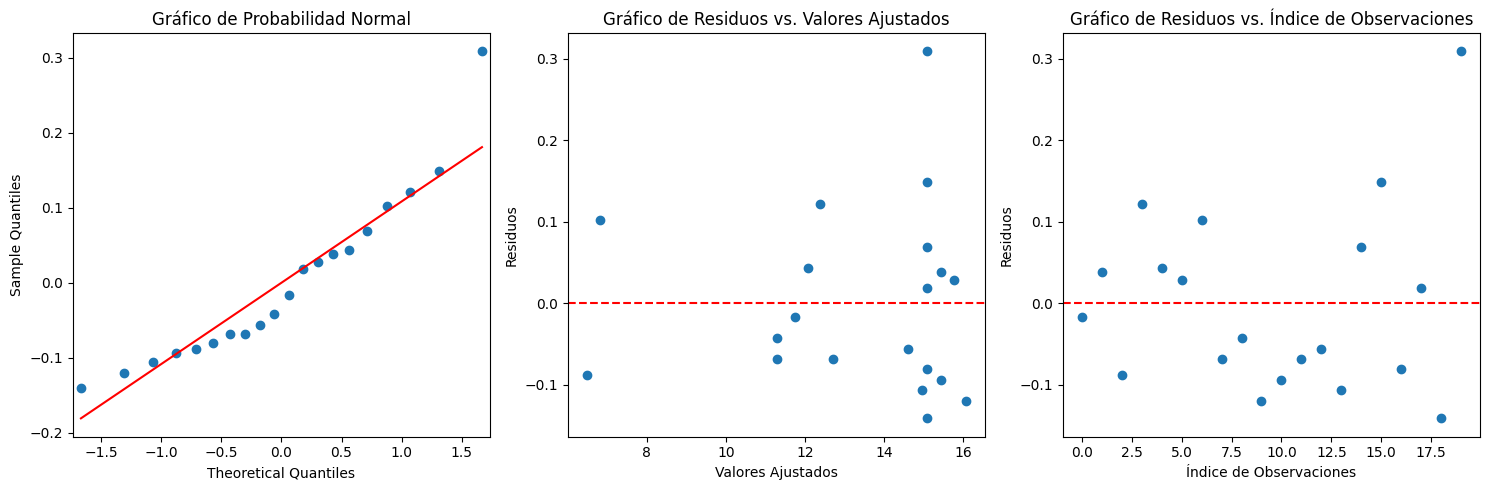

In [80]:
import matplotlib.pyplot as plt

# Se obtienen los residuos del modelo
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

# Crear una figura con tres subplots en una fila
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de probabilidad normal (QQ-plot)
sm.qqplot(residuos, line='s', ax=axs[0])
axs[0].set_title('Gráfico de Probabilidad Normal')

# Gráfico de residuos vs. valores ajustados
axs[1].scatter(valores_ajustados, residuos)
axs[1].set_xlabel('Valores Ajustados')
axs[1].set_ylabel('Residuos')
axs[1].set_title('Gráfico de Residuos vs. Valores Ajustados')
# Agregar una línea punteada en el eje y en 0
axs[1].axhline(0, color='red', linestyle='--')

# Gráfico de dispersión de residuos vs. índice de observaciones
indice_observaciones = pd.Series(range(len(residuos)))
axs[2].scatter(indice_observaciones, residuos)
axs[2].set_xlabel('Índice de Observaciones')
axs[2].set_ylabel('Residuos')
axs[2].set_title('Gráfico de Residuos vs. Índice de Observaciones')
# Agregar una línea punteada en el eje y en 0
axs[2].axhline(0, color='red', linestyle='--')

# Ajustar la disposición de los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [81]:
# Importar la biblioteca scipy.optimize
from scipy.optimize import minimize

# Definir la función objetivo
def objetivo(factors):
    A, B, C = factors
    return -modelo.predict({'A': [A], 'B': [B], 'C': [C]})[0]

# Establecer los límites para factores
limites_factores = [(min(design['A']), max(design['A'])),  (min(design['B']), max(design['B'])), (min(design['C']), max(design['C']))]

# Establecer un punto de inicio para la optimización
valores_iniciales = [0, 0, 0]  # Valores iniciales de factores

# Realizar la optimización para maximizar la función objetivo
resultado_optimizacion = minimize(objetivo, valores_iniciales, bounds=limites_factores, method='SLSQP')

# Los resultados de la optimización se encuentran en resultado_optimizacion
valores_optimos = resultado_optimizacion.x
valor_maximo_Y = -resultado_optimizacion.fun

# Muestra los resultados de la optimización
print("Valores óptimos de los factores:", valores_optimos)
print("Valor máximo de Y:", valor_maximo_Y)

Valores óptimos de los factores: [ 0.76266505 -0.48720145  0.28813779]
Valor máximo de Y: 16.514624690232566


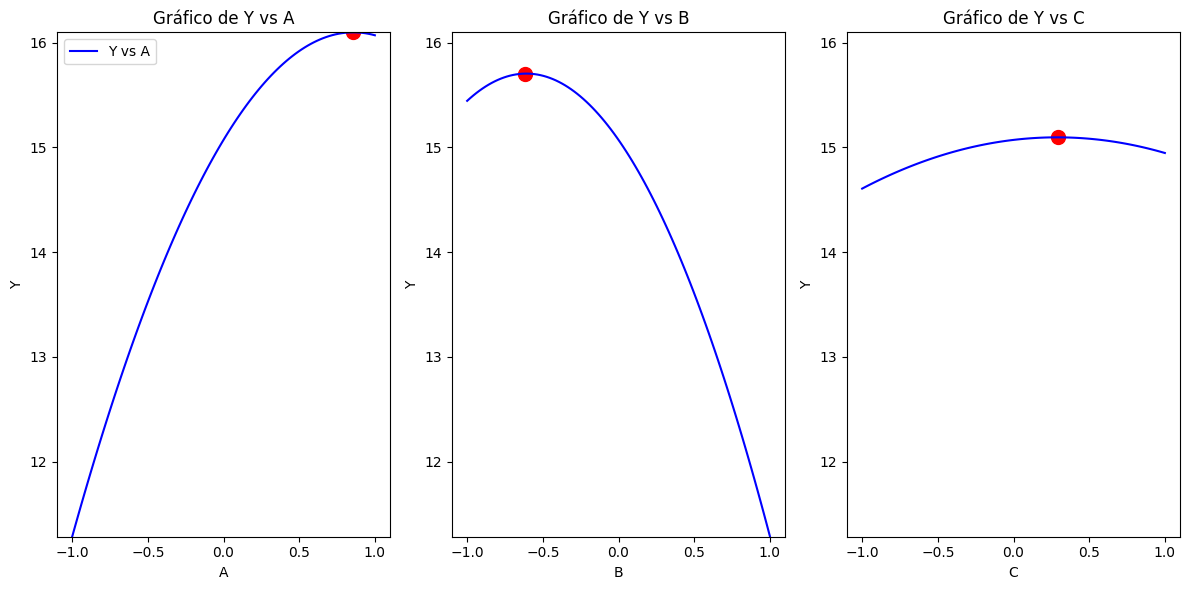

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de A y B en el rango de -1 a 1
valores_A = np.linspace(-1, 1, 100)
valores_B = np.linspace(-1, 1, 100)
valores_C = np.linspace(-1, 1, 100)

# Calcular los valores correspondientes de Y para cada valor de factores
Y_A = modelo.predict({'A': valores_A, 'B': np.zeros_like(valores_A), 'C': np.zeros_like(valores_A)})
Y_B = modelo.predict({'A': np.zeros_like(valores_B), 'B': valores_B, 'C': np.zeros_like(valores_B)})
Y_C = modelo.predict({'A': np.zeros_like(valores_C), 'B': np.zeros_like(valores_C), 'C': valores_C})

# Crear una figura con subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Gráfico de Y vs A
ax1.plot(valores_A, Y_A, label='Y vs A', color='blue')
ax1.set_xlabel('A')
ax1.set_ylabel('Y')
ax1.set_title('Gráfico de Y vs A')

# Gráfico de Y vs B
ax2.plot(valores_B, Y_B, label='Y vs B', color='blue')
ax2.set_xlabel('B')
ax2.set_ylabel('Y')
ax2.set_title('Gráfico de Y vs B')

# Gráfico de Y vs C
ax3.plot(valores_C, Y_C, label='Y vs C', color='blue')
ax3.set_xlabel('C')
ax3.set_ylabel('Y')
ax3.set_title('Gráfico de Y vs C')

# Establecer los mismos límites en el eje y para todos los subplots
min_y = min(min(Y_A), min(Y_B), min(Y_C))
max_y = max(max(Y_A), max(Y_B), max(Y_C))
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)
ax3.set_ylim(min_y, max_y)

# Mostrar leyenda en uno de los gráficos (puedes elegir el que prefieras)
ax1.legend()

# Encontrar el máximo en Y vs A
indice_max_Y_A = np.argmax(Y_A)
valor_max_Y_A = Y_A[indice_max_Y_A]
valor_correspondiente_A = valores_A[indice_max_Y_A]

# Encontrar el máximo en Y vs B
indice_max_Y_B = np.argmax(Y_B)
valor_max_Y_B = Y_B[indice_max_Y_B]
valor_correspondiente_B = valores_B[indice_max_Y_B]

# Encontrar el máximo en Y vs C
indice_max_Y_C = np.argmax(Y_C)
valor_max_Y_C = Y_C[indice_max_Y_C]
valor_correspondiente_C = valores_C[indice_max_Y_C]

# Agregar puntos rojos en las gráficas Y vs A, Y vs B y Y vs C en los máximos
ax1.scatter(valor_correspondiente_A, valor_max_Y_A, color='red', marker='o', label='Máximo Y vs A', s=100)
ax2.scatter(valor_correspondiente_B, valor_max_Y_B, color='red', marker='o', label='Máximo Y vs B', s=100)
ax3.scatter(valor_correspondiente_C, valor_max_Y_C, color='red', marker='o', label='Máximo Y vs C', s=100)

plt.tight_layout()
plt.show()

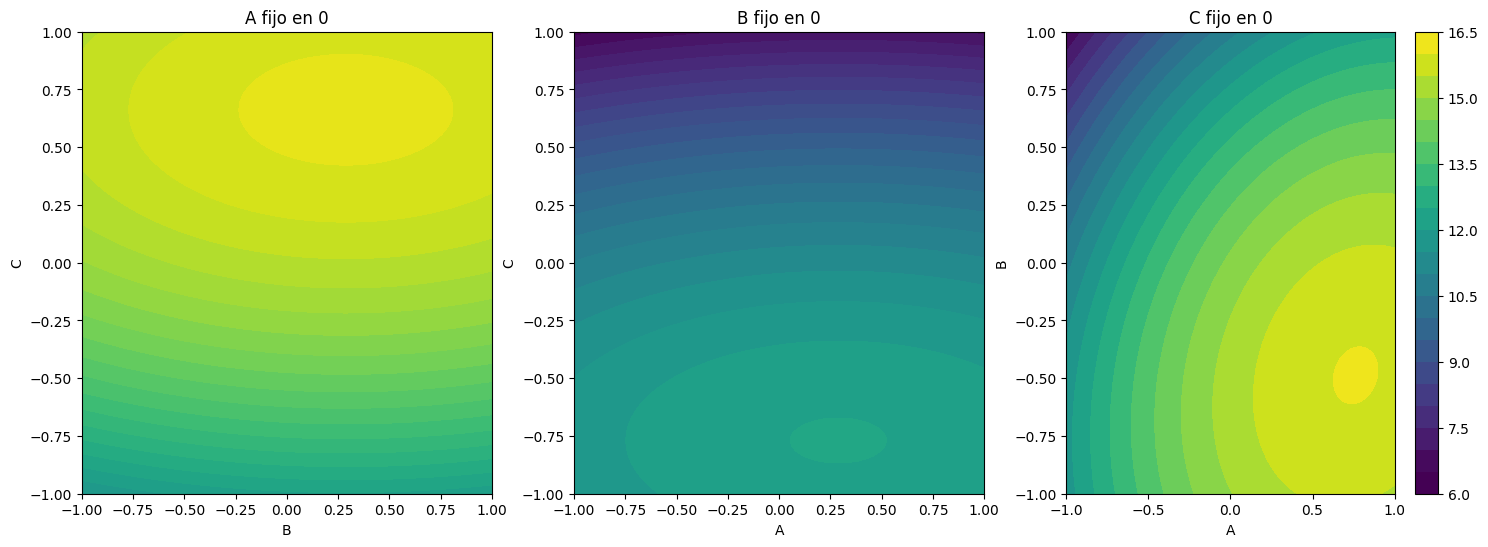

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de factores en el rango de -1 a 1
valores_A = np.linspace(-1, 1, 100)
valores_B = np.linspace(-1, 1, 100)
valores_C = np.linspace(-1, 1, 100)

A, B, C = np.meshgrid(valores_A, valores_B, valores_C)

# Calcular Z en función de A, B y C
Z = modelo.predict({'A': A.flatten(), 'B': B.flatten(), 'C': C.flatten()}).values.reshape(A.shape)

# Determinar los límites de la escala de color
vmin = Z.min()
vmax = Z.max()

# Crear gráficas de contorno
plt.figure(figsize=(18, 6))

# Gráfica con A fijo en 0
plt.subplot(131)
contour = plt.contourf(valores_B, valores_C, Z[0, :, :], cmap='viridis', levels=20, vmin=vmin, vmax=vmax)
plt.xlabel('B')
plt.ylabel('C')
plt.title('A fijo en 0')

# Gráfica con B fijo en 0
plt.subplot(132)
contour = plt.contourf(valores_A, valores_C, Z[:, 0, :], cmap='viridis', levels=20, vmin=vmin, vmax=vmax)
plt.xlabel('A')
plt.ylabel('C')
plt.title('B fijo en 0')

# Gráfica con C fijo en 0
plt.subplot(133)
contour = plt.contourf(valores_A, valores_B, Z[:, :, 0], cmap='viridis', levels=20, vmin=vmin, vmax=vmax)
plt.xlabel('A')
plt.ylabel('B')
plt.title('C fijo en 0')

# Agregar una barra de colores para todas las gráficas
plt.colorbar(contour)
plt.show()


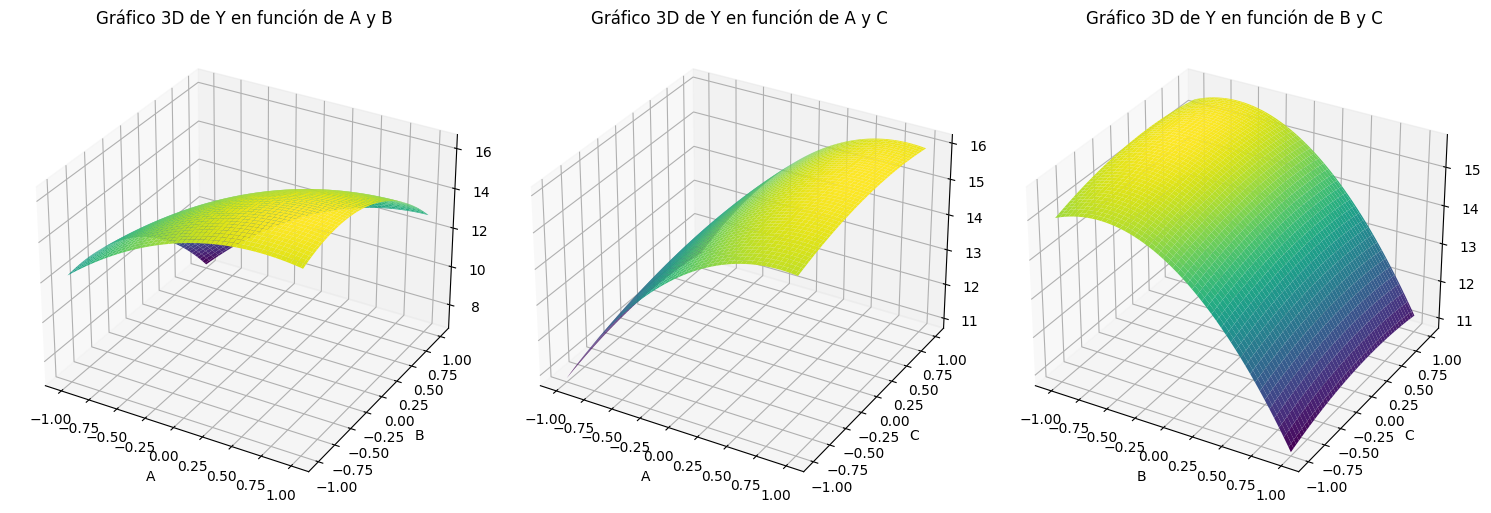

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Define la ecuación del modelo como una función
def modelo(variables):
    # La ecuación del modelo debe depender de las variables en forma de una lista
    # Por ejemplo, variables = [A, B, C, ...] y la ecuación se construye en función de estas variables
    A, B, C = variables
    Y = 15.0710 + 2.3940 * A + -2.0780 * B + 0.1700 * C + -1.3950 * np.power(A, 2) + -1.7050 * np.power(B, 2) + -0.2950 * np.power(C, 2) + 0.5462 * A * B
    return Y

# Define las variables independientes
independent_variables = ['A', 'B', 'C']  # Agrega todas las variables independientes que necesites

# Datos de ejemplo
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Calcula el número de subtramas necesarias
num_variables = len(independent_variables)
combinations = list(itertools.combinations(independent_variables, 2))
num_subplots = len(combinations)

# Crea una figura con subtramas
fig, axes = plt.subplots(1, num_subplots, figsize=(5*num_subplots, 5), subplot_kw={'projection': '3d'})

# Genera y grafica las superficies para cada combinación de variables
for i, combo in enumerate(combinations):
    var1, var2 = combo
    var_values = [0] * num_variables
    var1_index = independent_variables.index(var1)
    var2_index = independent_variables.index(var2)
    A, B = np.meshgrid(x, y)
    var_values[var1_index] = A
    var_values[var2_index] = B
    Z = modelo(var_values)

    axes[i].plot_surface(A, B, Z, cmap='viridis')
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)
    axes[i].set_zlabel('Y')
    title = 'Gráfico 3D de Y en función de {} y {}'.format(var1, var2)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()


In [85]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
from ipywidgets import interact

# Define la ecuación del modelo como una función
def modelo(variables):
    A, B, C = variables
    Y = 15.0710 + 2.3940 * A + -2.0780 * B + 0.1700 * C + -1.3950 * np.power(A, 2) + -1.7050 * np.power(B, 2) + -0.2950 * np.power(C, 2) + 0.5462 * A * B
    return Y

# Define las variables independientes
independent_variables = ['A', 'B', 'C']

# Datos de ejemplo
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Calcula el número de subtramas necesarias
num_variables = len(independent_variables)
combinations = list(itertools.combinations(independent_variables, 2))
num_subplots = len(combinations)

# Crear una función para generar y graficar las superficies
def plot_surface(var1, var2):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')

    var_values = [0] * num_variables
    var1_index = independent_variables.index(var1)
    var2_index = independent_variables.index(var2)
    A, B = np.meshgrid(x, y)
    var_values[var1_index] = A
    var_values[var2_index] = B
    Z = modelo(var_values)

    ax.plot_surface(A, B, Z, cmap='viridis')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Y')
    title = 'Gráfico 3D de Y en función de {} y {}'.format(var1, var2)
    ax.set_title(title)
    plt.show()

# Agregar interactividad para rotar la gráfica
interact(plot_surface, var1=independent_variables, var2=independent_variables)


interactive(children=(Dropdown(description='var1', options=('A', 'B', 'C'), value='A'), Dropdown(description='…

<function __main__.plot_surface(var1, var2)>

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
from ipywidgets import interact, widgets

# Define la ecuación del modelo como una función
def modelo(variables):
    A, B, C = variables
    Y = 15.0710 + 2.3940 * A + -2.0780 * B + 0.1700 * C + -1.3950 * np.power(A, 2) + -1.7050 * np.power(B, 2) + -0.2950 * np.power(C, 2) + 0.5462 * A * B
    return Y

# Define las variables independientes
independent_variables = ['A', 'B', 'C']

# Datos de ejemplo
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Calcula el número de subtramas necesarias
num_variables = len(independent_variables)
combinations = list(itertools.combinations(independent_variables, 2))
num_subplots = len(combinations)

# Crear una función para generar y graficar las superficies
def plot_surface(var1, var2, rotation_angle):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')

    var_values = [0] * num_variables
    var1_index = independent_variables.index(var1)
    var2_index = independent_variables.index(var2)
    A, B = np.meshgrid(x, y)
    var_values[var1_index] = A
    var_values[var2_index] = B
    Z = modelo(var_values)

    ax.plot_surface(A, B, Z, cmap='viridis')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Y')
    title = 'Gráfico 3D de Y en función de {} y {}'.format(var1, var2)
    ax.set_title(title)

    # Rotar la gráfica en el eje Z
    ax.view_init(elev=30, azim=rotation_angle)

    plt.show()

# Agregar interactividad para rotar la gráfica
interact(plot_surface, var1=independent_variables, var2=independent_variables, rotation_angle=widgets.FloatSlider(min=0, max=360, step=1, value=0))


interactive(children=(Dropdown(description='var1', options=('A', 'B', 'C'), value='A'), Dropdown(description='…

<function __main__.plot_surface(var1, var2, rotation_angle)>